In [6]:
#Work
#請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
#請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [7]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [8]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [10]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1)) #reshape（行，列）可以根据指定的数值将数据转换为特定的行数和列数，这个好理解，就是转换成矩阵。
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10) #keras.utils.to_categorical函數：是把類別標籤轉換爲onehot編碼（categorical就是類別標籤的意思，表示現實世界中你分類的各類別）， 而onehot編碼是一種方便計算機處理的二元編碼。**
y_test = keras.utils.to_categorical(y_test, num_classes=10) #num_classes为标签类别总数

In [11]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]]) #Input()用于实例化Keras张量.  shape值(2,)，意思是一维数组，数组中有2个元素
    x = keras.layers.Dense(units=512, activation="relu")(input_layer) #全连接层 units: 正整数，输出空间维度 activation: 激活函数
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
"""
Compile 模型
"""
model.summary() #模型摘要

optimizer = keras.optimizers.SGD(lr=0.001) #lr：float> = 0.學習率  optimizers.Adam 優化器
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer) #compile() 函数将一个字符串编译为字节代码。
#categorical_crossentropy：亦称作多类的对数损失，注意使用该目标函数时，需要将标签转化为形如(nb_samples, nb_classes)的二值序列
#metrics指標  accuracy 準確率

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [16]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test),  #形式为（X，y）或（X，y，sample_weights）的tuple，是指定的验证集。此参数将覆盖validation_spilt。
          shuffle=True) #shuffle：是否把數據隨機打亂之後再進行訓練

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 188us/step - loss: 0.0077 - acc: 0.9994 - val_loss: 4.8056 - val_acc: 0.5040
Epoch 2/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.0072 - acc: 0.9996 - val_loss: 4.8073 - val_acc: 0.5039
Epoch 3/500
50000/50000 [==============================] - 8s 164us/step - loss: 0.0069 - acc: 0.9997 - val_loss: 4.8085 - val_acc: 0.5043
Epoch 4/500
50000/50000 [==============================] - 8s 163us/step - loss: 0.0067 - acc: 0.9997 - val_loss: 4.8096 - val_acc: 0.5038
Epoch 5/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.0065 - acc: 0.9998 - val_loss: 4.8109 - val_acc: 0.5032
Epoch 6/500
50000/50000 [==============================] - 9s 177us/step - loss: 0.0064 - acc: 0.9998 - val_loss: 4.8119 - val_acc: 0.5038
Epoch 7/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.0062 - acc: 0.9998 - val_loss: 4.

50000/50000 [==============================] - 9s 175us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 4.8591 - val_acc: 0.5040
Epoch 60/500
50000/50000 [==============================] - 9s 170us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 4.8599 - val_acc: 0.5041
Epoch 61/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 4.8606 - val_acc: 0.5038
Epoch 62/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 4.8614 - val_acc: 0.5040
Epoch 63/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 4.8621 - val_acc: 0.5040
Epoch 64/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 4.8629 - val_acc: 0.5042
Epoch 65/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0042 - acc: 1.0000 - val_loss: 4.8637 - val_acc: 0.5042
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 9s 172us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 4.8978 - val_acc: 0.5052
Epoch 118/500
50000/50000 [==============================] - 8s 170us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 4.8985 - val_acc: 0.5052
Epoch 119/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 4.8991 - val_acc: 0.5052
Epoch 120/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 4.8998 - val_acc: 0.5053
Epoch 121/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 4.9004 - val_acc: 0.5051
Epoch 122/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 4.9009 - val_acc: 0.5053
Epoch 123/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.0036 - acc: 1.0000 - val_loss: 4.9015 - val_acc: 0.5055
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 9s 173us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 4.9300 - val_acc: 0.5056
Epoch 176/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 4.9305 - val_acc: 0.5056
Epoch 177/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 4.9310 - val_acc: 0.5057
Epoch 178/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 4.9316 - val_acc: 0.5058
Epoch 179/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 4.9320 - val_acc: 0.5059
Epoch 180/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 4.9325 - val_acc: 0.5058
Epoch 181/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 4.9330 - val_acc: 0.5058
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 9s 173us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 4.9576 - val_acc: 0.5058
Epoch 234/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 4.9580 - val_acc: 0.5058
Epoch 235/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 4.9584 - val_acc: 0.5058
Epoch 236/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 4.9589 - val_acc: 0.5058
Epoch 237/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 4.9594 - val_acc: 0.5059
Epoch 238/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 4.9598 - val_acc: 0.5055
Epoch 239/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 4.9602 - val_acc: 0.5058
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 9s 173us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9821 - val_acc: 0.5055
Epoch 292/500
50000/50000 [==============================] - 8s 170us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9825 - val_acc: 0.5054
Epoch 293/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9829 - val_acc: 0.5055
Epoch 294/500
50000/50000 [==============================] - 9s 171us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9833 - val_acc: 0.5055
Epoch 295/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9837 - val_acc: 0.5056
Epoch 296/500
50000/50000 [==============================] - 9s 173us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9841 - val_acc: 0.5056
Epoch 297/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 4.9845 - val_acc: 0.5056
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 9s 176us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 5.0038 - val_acc: 0.5058
Epoch 350/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 5.0041 - val_acc: 0.5057
Epoch 351/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 5.0044 - val_acc: 0.5059
Epoch 352/500
50000/50000 [==============================] - 9s 181us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 5.0047 - val_acc: 0.5060
Epoch 353/500
50000/50000 [==============================] - 9s 179us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 5.0051 - val_acc: 0.5059
Epoch 354/500
50000/50000 [==============================] - 9s 178us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 5.0054 - val_acc: 0.5059
Epoch 355/500
50000/50000 [==============================] - 9s 183us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 5.0058 - val_acc: 0.5058
Epoch 356/500
50000/50000 [

Epoch 407/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 5.0233 - val_acc: 0.5062
Epoch 408/500
50000/50000 [==============================] - 9s 170us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 5.0236 - val_acc: 0.5065
Epoch 409/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 5.0239 - val_acc: 0.5065
Epoch 410/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 5.0242 - val_acc: 0.5063
Epoch 411/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 5.0245 - val_acc: 0.5064
Epoch 412/500
50000/50000 [==============================] - 9s 172us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 5.0249 - val_acc: 0.5065
Epoch 413/500
50000/50000 [==============================] - 9s 175us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 5.0253 - val_acc: 0.5065
Epoch 414/500

Epoch 465/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 5.0415 - val_acc: 0.5065
Epoch 466/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 5.0418 - val_acc: 0.5066
Epoch 467/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 5.0421 - val_acc: 0.5066
Epoch 468/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 5.0424 - val_acc: 0.5066
Epoch 469/500
50000/50000 [==============================] - 9s 176us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 5.0427 - val_acc: 0.5067
Epoch 470/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 5.0430 - val_acc: 0.5066
Epoch 471/500
50000/50000 [==============================] - 9s 174us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 5.0433 - val_acc: 0.5066
Epoch 472/500

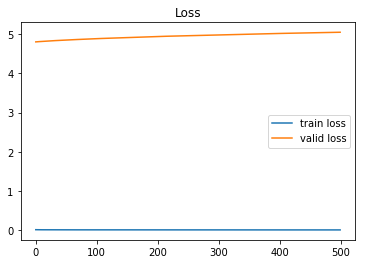

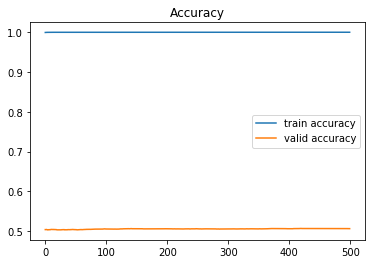

In [18]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()
'''
acc: 模型在训练集上准确率
loss: 模型在训练集上的代价函数值
val_acc: 模型在验证集上准确率
val_loss: 模型在验证集上的代价函数值
'''
